In [281]:
ls

 Volume in drive G is New Volume
 Volume Serial Number is AAA4-0BD0

 Directory of G:\Sanit_Horizontal\Data Analysis\Dharin Project files\Friction Measurement Issues

28-12-2022  14:53    <DIR>          .
28-12-2022  14:53    <DIR>          ..
27-12-2022  13:42    <DIR>          .ipynb_checkpoints
18-12-2022  20:15        31,206,173 _30N_Vel.xlsx
18-12-2022  20:15        40,199,211 _40N_Vel.xlsx
18-12-2022  20:15        36,293,735 _50N_Vel.xlsx
19-12-2022  17:18           466,220 30N cleaner.ipynb
18-12-2022  20:15        17,990,829 30N.pkl
19-12-2022  17:19         6,042,869 30N_cycle_data.pkl
18-12-2022  20:15         8,536,764 30N_Od_removed.pkl
19-12-2022  17:18         6,049,478 30N_Od_removed_corrected.pkl
26-12-2022  17:30    <DIR>          30N_plots
18-12-2022  20:15        19,296,071 40N.pkl
19-12-2022  16:03         8,276,641 40N_cycle_data.pkl
18-12-2022  20:15         8,284,975 40N_Od_removed.pkl
19-12-2022  09:27    <DIR>          40N_plots
27-12-2022  09:54           905,

In [282]:
d = pd.read_pickle('50N_cycle_reg_final.pkl')

In [283]:
d.keys()

dict_keys(['1kmph', '1.5kmph', '3kmph', '4kmph', '5kmph', '6kmph', '7kmph', '8kmph', '9kmph', '10kmph', '15kmph', '20kmph'])

In [284]:
dum = pd.DataFrame(d['9kmph'])

In [285]:
dum.head()

,vel,T_cor,F_lever,T_SG,press,temp,pos,mu
0,9.0035,140.2142,49.9333,152.2073,13.529,33.5466,14.44,0.335865
1,8.9748,138.4373,50.0347,156.6391,13.882,33.7474,14.44,0.336855
2,9.0744,139.8543,49.9707,151.5453,13.424,34.0319,14.44,0.337020
3,9.0853,137.5040,49.9400,153.2229,13.489,34.0821,14.44,0.339109
4,8.9956,138.0468,49.9893,154.4990,13.725,34.1752,14.44,0.336054


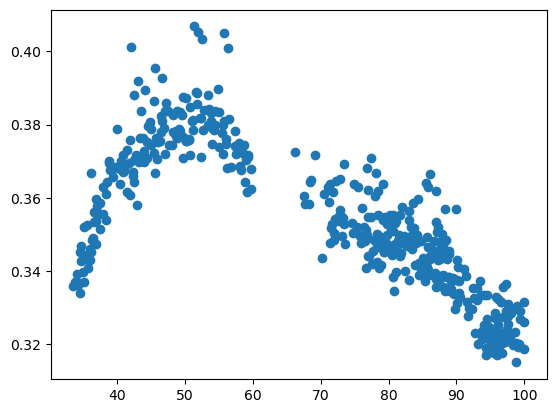

In [286]:
plt.scatter(dum['temp'],dum['mu'])

In [287]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [288]:
X = pd.DataFrame(dum['temp'])
y = pd.DataFrame(dum['mu'])

In [289]:

degree=5
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

TypeError: 'str' object is not callable

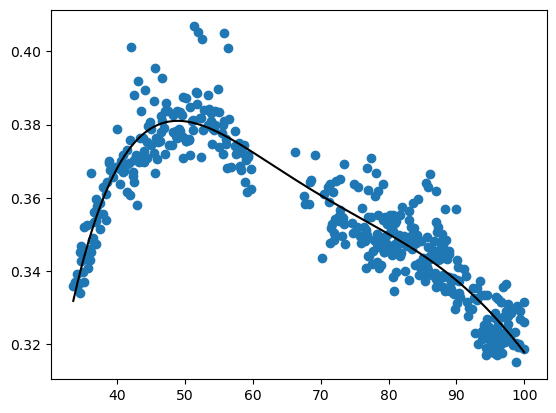

In [290]:
plt.figure()
plt.scatter(X,y)
plt.plot(X,polyreg.predict(X),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [ ]:
polyreg.score(X,y)

In [ ]:
polyreg.get_feature_names_out

# Time Series Analysis

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(dum['mu'], model='additive', period=5)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Running Median

In [ ]:
N = len(dum['mu'])
total_bins = 20

# Sample data

XX = np.array(dum['temp'])
YY = np.array(dum['mu'])



bins = np.linspace(XX.min(),XX.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(XX,bins)
running_median = [np.median(YY[idx==k]) for k in range(total_bins)]

plt.scatter(XX,YY,color='b',alpha=.6,s=2)
plt.plot(bins-delta/2,running_median,'r--',lw=4,alpha=.8)
plt.title('5kgf', fontsize=16)
plt.xlabel("temp", fontsize=16)
plt.ylabel("cof", fontsize=16)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.axis('tight')
plt.show()

# Polynomial Regression

In [291]:
dum = pd.DataFrame(d['3kmph'])

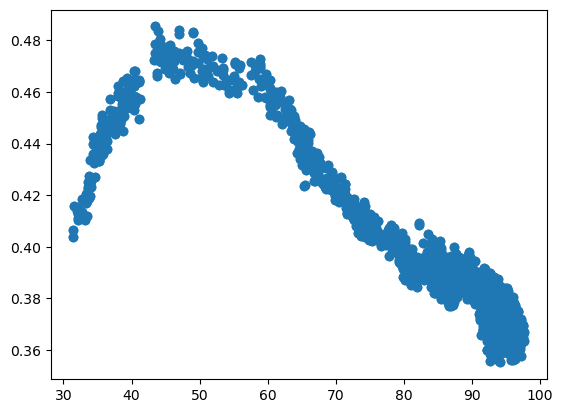

In [292]:
x = np.array(dum['temp'])
y = np.array(dum['mu'])

plt.scatter(x,y)

In [293]:
from sklearn.preprocessing import PolynomialFeatures

deg = 4

# Instancing the regressor
poly = PolynomialFeatures(degree = deg, include_bias =  False)

In [294]:
poly_features = poly.fit_transform(x.reshape(-1,1))

In [295]:
from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()

In [296]:
poly_reg_model.fit(poly_features,y)

LinearRegression()

In [297]:
ypred = poly_reg_model.predict(poly_features)

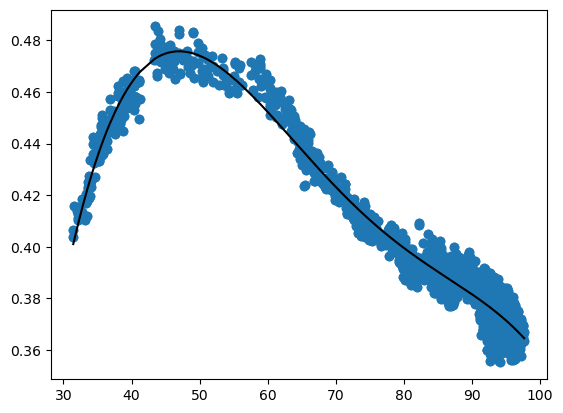

In [298]:
plt.plot(x,ypred, color = "black")
plt.scatter(x,y)

In [299]:
poly_reg_model.coef_

array([ 7.93922877e-02, -1.71126214e-03,  1.55261588e-05, -5.15991585e-08])

In [300]:
from sklearn.metrics import r2_score

r2_score(y,ypred)

0.9620802092551982

# Final Code

# Data Input

In [301]:
d = pd.read_pickle('50N_cycle_reg_final.pkl')

In [302]:
dum = pd.DataFrame(d['3kmph'])

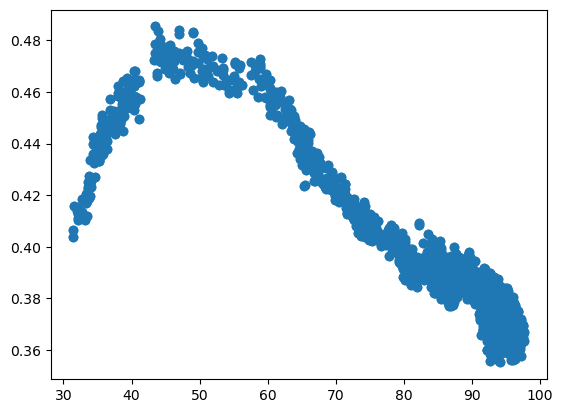

In [303]:
x = np.array(dum['temp'])
y = np.array(dum['mu'])

plt.scatter(x,y)

# Polynomial Regression Fitting Function

In [304]:
def reg_fit(x,y,deg):
    
    # Importing the library
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score

    # Instancing the regressor
    poly = PolynomialFeatures(degree = deg, include_bias =  False)
    poly_reg_model = LinearRegression()
    
    # Training the model
    poly_features = poly.fit_transform(x.reshape(-1,1))
    poly_reg_model.fit(poly_features,y)
    
    # Prediction
    ypred = poly_reg_model.predict(poly_features)
    
    # Co-relation Coefficient
    score = r2_score(y,ypred)
    
    # Coefficient of polynomial fit
    coef = poly_reg_model.coef_
    
    return coef,score,ypred   

In [305]:
d2 = {}
for key in key_list:
    
    d2[key] = {}

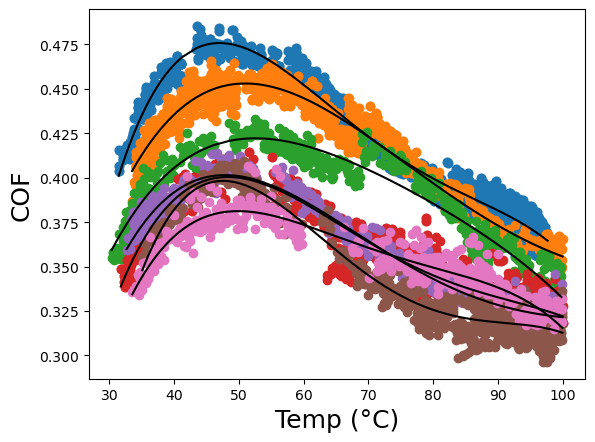

In [313]:
for i in np.arange(2,len(key_list)-2,1):
# for i in np.arange(4,5,1):

    dum = pd.DataFrame(d[key_list[i]])
    x = np.array(dum['temp'])
    y = np.array(dum['mu'])
    deg = 4

    cf,r2,yp = reg_fit(x,y,deg)

#     print(f'{cf};{r2};{yp[0]}')
    
    
    
    # Plotting the curves
    if (r2 > 0.85):
        
        d2[key_list[i]]['coef'] = cf
        d2[key_list[i]]['score'] = r2
        d2[key_list[i]]['ypred'] = yp
        
        plt.scatter(x,y)
        plt.plot(x,yp,color = "black")
        plt.ylabel('COF', size = 18)
        plt.xlabel('Temp (°C)', size = 18)
        

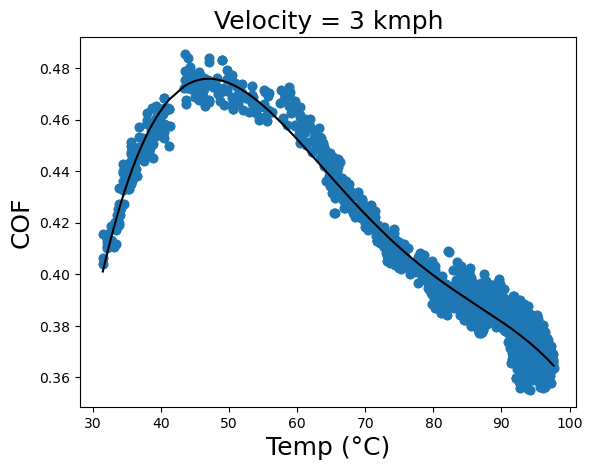

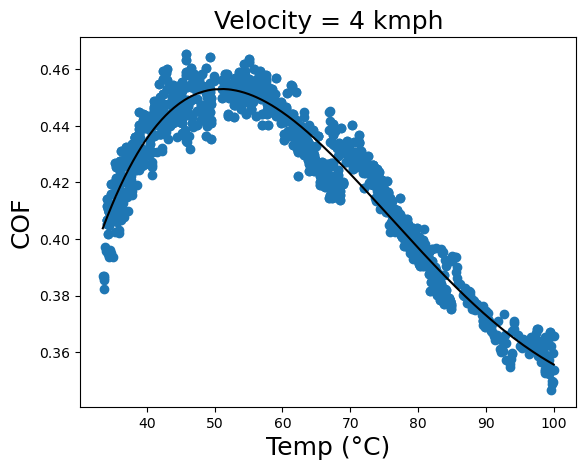

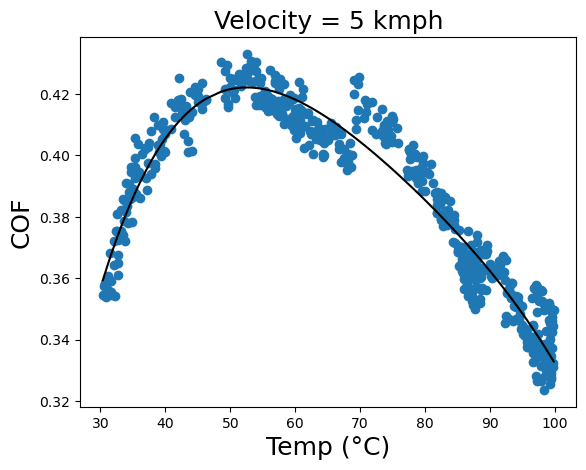

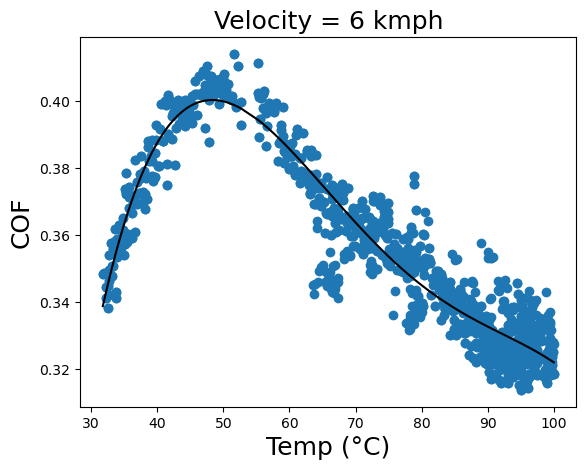

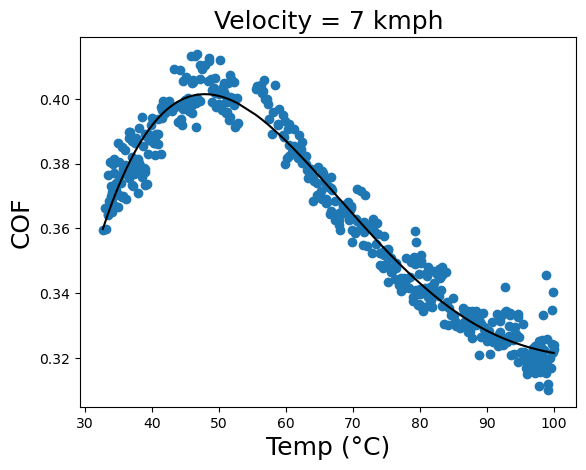

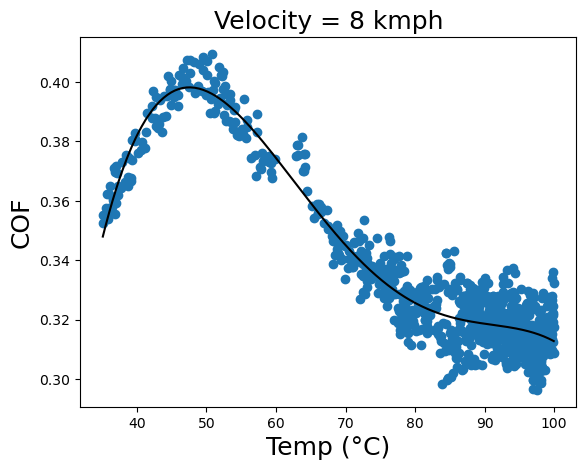

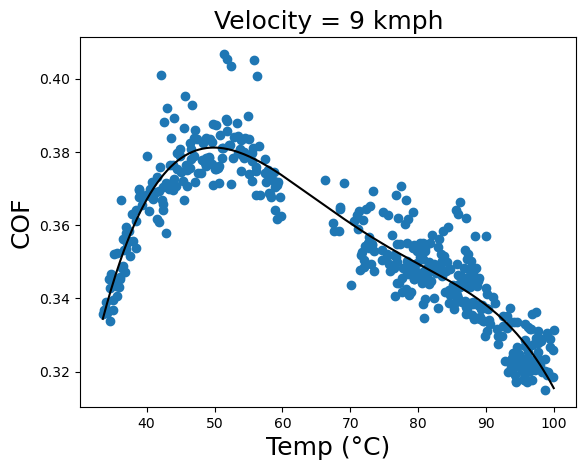

In [320]:
for i in np.arange(2,len(key_list)-2,1):
# for i in np.arange(4,5,1):

    dum = pd.DataFrame(d[key_list[i]])
    x = np.array(dum['temp'])
    y = np.array(dum['mu'])
    deg = 4

    cf,r2,yp = reg_fit(x,y,deg)

#     print(f'{cf};{r2};{yp[0]}')
    
    
    
    # Plotting the curves
    if (r2 > 0.85):
        
        d2[key_list[i]]['coef'] = cf
        d2[key_list[i]]['score'] = r2
        d2[key_list[i]]['ypred'] = yp
        
        plt.scatter(x,y)
        plt.plot(x,yp,color = "black")
        plt.ylabel('COF', size = 18)
        plt.xlabel('Temp (°C)', size = 18)
        b = int(dum['vel'].median())
        plt.title(f'Velocity = {b} kmph',size = 18)
        plt.show()
        

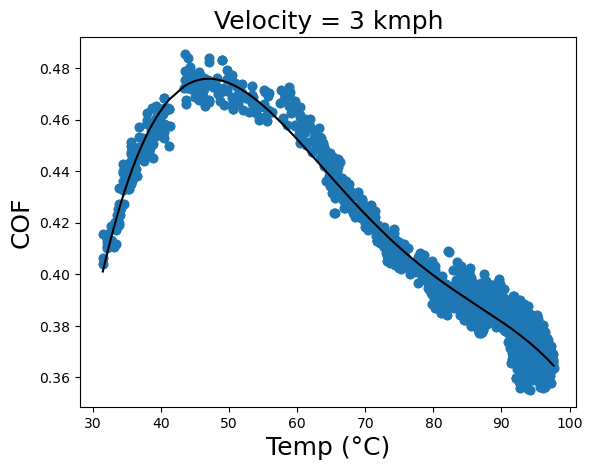

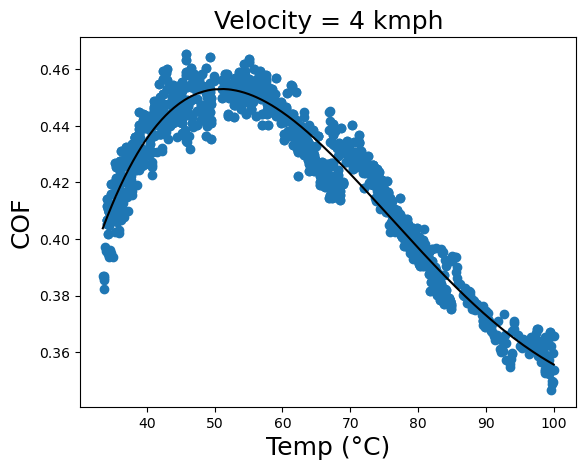

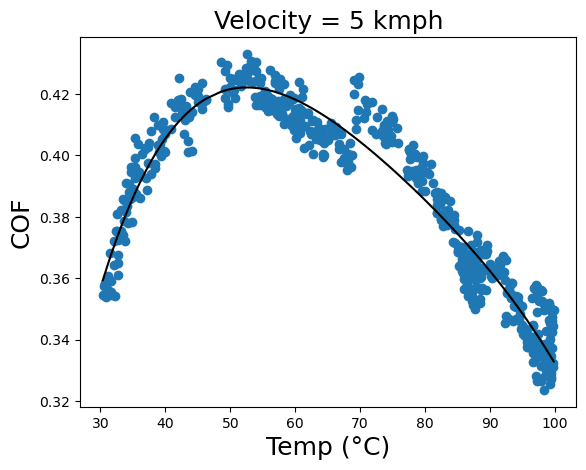

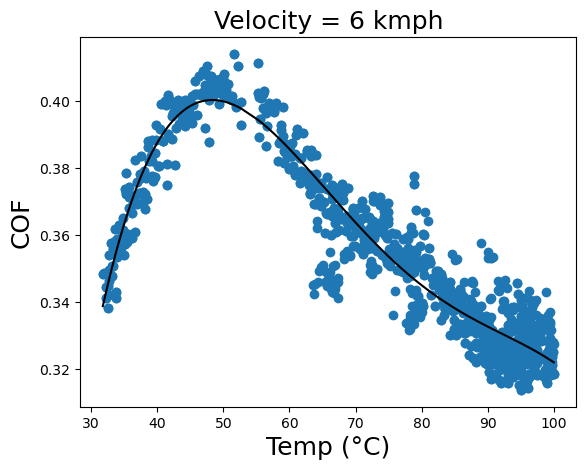

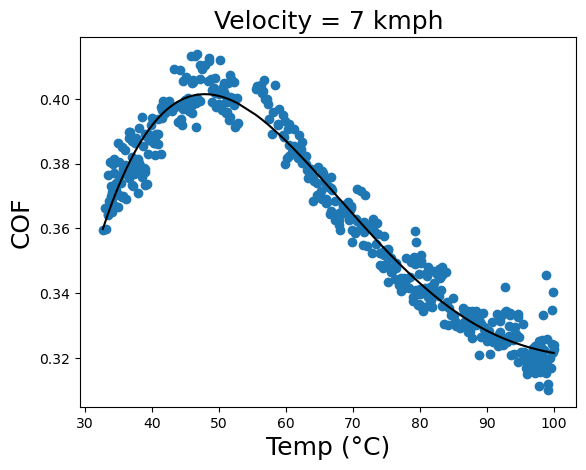

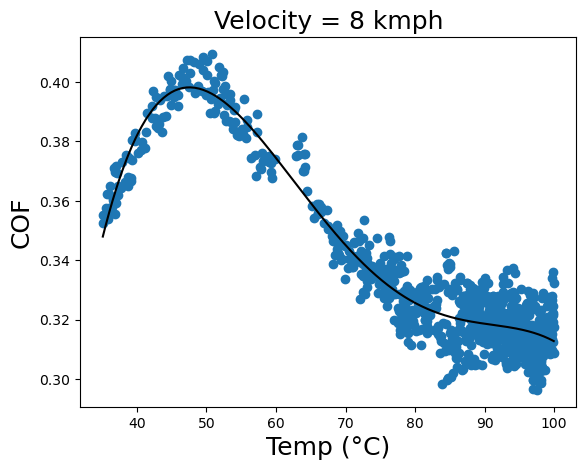

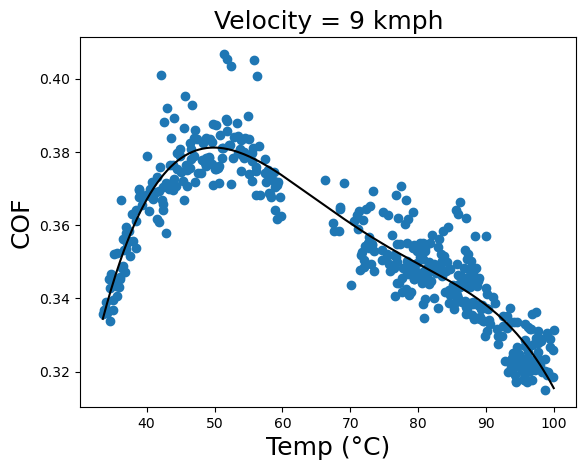

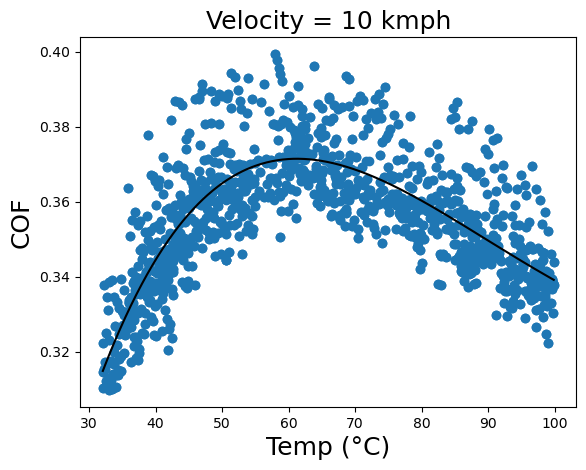

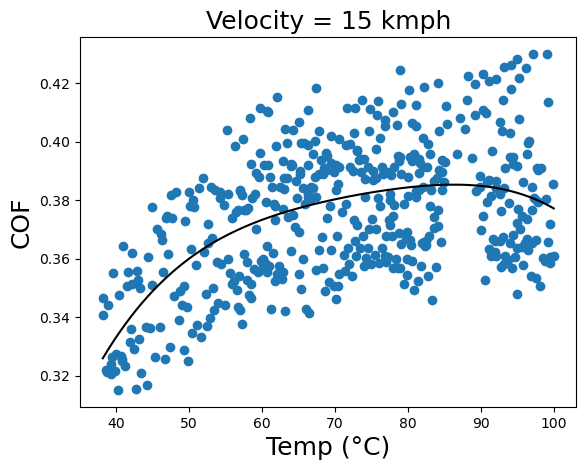

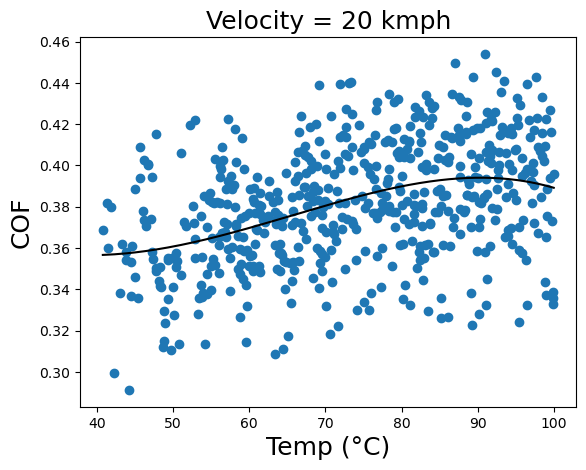

In [323]:
for i in np.arange(2,len(key_list),1):
# for i in np.arange(4,5,1):

    dum = pd.DataFrame(d[key_list[i]])
    x = np.array(dum['temp'])
    y = np.array(dum['mu'])
    deg = 4

    cf,r2,yp = reg_fit(x,y,deg)

#     print(f'{cf};{r2};{yp[0]}')
    
    
    
  
        
    d2[key_list[i]]['coef'] = cf
    d2[key_list[i]]['score'] = r2
    d2[key_list[i]]['ypred'] = yp
        
    plt.scatter(x,y)
    plt.plot(x,yp,color = "black")
    plt.ylabel('COF', size = 18)
    plt.xlabel('Temp (°C)', size = 18)
    b = int(dum['vel'].max())
    plt.title(f'Velocity = {b} kmph',size = 18)
    plt.show()
        

In [308]:
d2

{'1kmph': {},
 '1.5kmph': {},
 '3kmph': {'coef': array([ 7.93922877e-02, -1.71126214e-03,  1.55261588e-05, -5.15991585e-08]),
  'score': 0.9620802092551982,
  'ypred': array([0.40105256, 0.40105256, 0.40121336, ..., 0.36479885, 0.36453657,
         0.36453657])},
 '4kmph': {'coef': array([ 3.48036434e-02, -6.18830529e-04,  4.36598664e-06, -1.08421035e-08]),
  'score': 0.9420009210743178,
  'ypred': array([0.4038217 , 0.40448955, 0.40457971, ..., 0.35578621, 0.35570998,
         0.35566615])},
 '5kmph': {'coef': array([ 3.22646851e-02, -6.23954759e-04,  5.18893738e-06, -1.66755541e-08]),
  'score': 0.9328030951291912,
  'ypred': array([0.35935831, 0.36107769, 0.3612231 , 0.36171222, 0.36222142,
         0.36418025, 0.36447808, 0.36465643, 0.36479432, 0.36635873,
         0.36756579, 0.36780041, 0.36801756, 0.37062818, 0.37090478,
         0.37113006, 0.37261507, 0.37298091, 0.37347609, 0.37376249,
         0.37404435, 0.37425721, 0.37438729, 0.37476928, 0.37654287,
         0.37684984, 

In [309]:
import pickle

In [310]:
f = open("50N_fit_data.pkl","wb")

pickle.dump(d2,f)

# close file
f.close()

# Pickling the model

In [311]:
# Importing the library
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [312]:
for i in np.arange(2,len(key_list)-2,1):
# for i in np.arange(4,5,1):

    dum = pd.DataFrame(d[key_list[i]])
    x = np.array(dum['temp'])
    y = np.array(dum['mu'])
    deg = 4
    
    # Instancing the regressor
    poly = PolynomialFeatures(degree = deg, include_bias =  False)
    poly_reg_model = LinearRegression()
    
    # Training the model
    poly_features = poly.fit_transform(x.reshape(-1,1))
    poly_reg_model.fit(poly_features,y)
    
    # Prediction
    ypred = poly_reg_model.predict(poly_features)
    
    # Co-relation Coefficient
    score = r2_score(y,ypred)
    
    if (score > 0.8):
        
        str = key_list[i]
    
        f = open(f'50N_{str}_fit_model.pkl',"wb")

        pickle.dump(poly_reg_model,f)

        # close file
        f.close()